In [2]:
import pandas as pd

In [3]:
df_booking = pd.read_csv("../Data-Analysis-Project/datasets/fact_bookings.csv")
print(df_booking.head())

         booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558     27-04-22      1/5/2022      2/5/2022   
1  May012216558RT12        16558     30-04-22      1/5/2022      2/5/2022   
2  May012216558RT13        16558     28-04-22      1/5/2022      4/5/2022   
3  May012216558RT14        16558     28-04-22      1/5/2022      2/5/2022   
4  May012216558RT15        16558     27-04-22      1/5/2022      2/5/2022   

   no_guests room_category booking_platform  ratings_given booking_status  \
0       -3.0           RT1    direct online            1.0    Checked Out   
1        2.0           RT1           others            NaN      Cancelled   
2        2.0           RT1          logtrip            5.0    Checked Out   
3       -2.0           RT1           others            NaN      Cancelled   
4        4.0           RT1    direct online            5.0    Checked Out   

   revenue_generated  revenue_realized  
0              10010             

DATA Exploration

In [4]:
df_booking.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [5]:
df_booking['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
df_booking['booking_platform'].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
df_booking['booking_platform'].value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

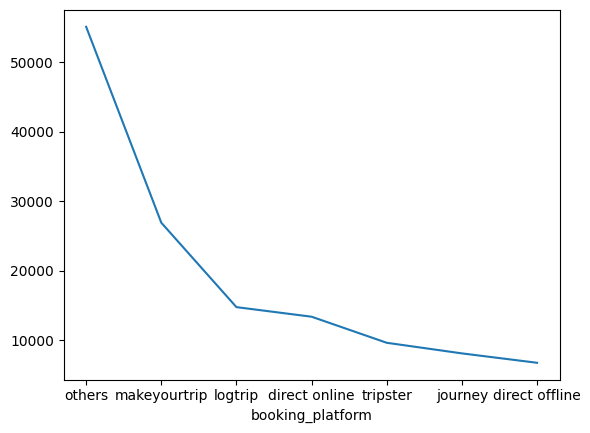

In [8]:
df_booking['booking_platform'].value_counts().plot()

In [9]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [10]:
df_date = pd.read_csv("../Data-Analysis-Project/datasets/dim_date.csv")
df_hotels = pd.read_csv("../Data-Analysis-Project/datasets/dim_hotels.csv")
df_rooms = pd.read_csv("../Data-Analysis-Project/datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("../Data-Analysis-Project/datasets/fact_aggregated_bookings.csv")

In [11]:
df_hotels.columns

Index(['property_id', 'property_name', 'category', 'city'], dtype='object')

In [12]:
df_hotels['category'].value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: ylabel='city'>

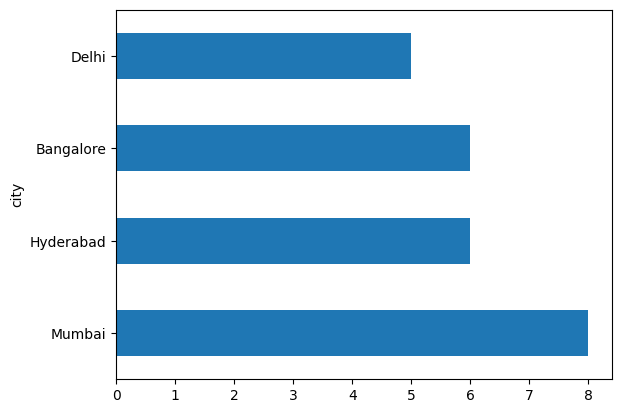

In [13]:
df_hotels['city'].value_counts().plot(kind='barh')

Data Cleaning

In [14]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [15]:
df_booking.shape

(134590, 12)

In [16]:
df_booking = df_booking[df_booking['no_guests'] > 0]

In [17]:
df_booking.shape

(134578, 12)

In [18]:
mins,maxs = df_booking['revenue_generated'].min(),df_booking['revenue_generated'].max()
(mins,maxs)

(6500, 28560000)

IQR, STD or remove outliers

In [19]:
avg , sdt = df_booking['revenue_generated'].mean(),df_booking['revenue_generated'].std()
(avg , sdt)

(15378.036937686695, 93040.1549314641)

In [20]:
heigher_limt = avg+ 3 * sdt
heigher_limt

294498.50173207896

In [21]:
lower_limit = avg - 3 * sdt
lower_limit

-263742.4278567056

In [22]:
df_booking[df_booking['revenue_generated']> heigher_limt]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [23]:
df_booking = df_booking[df_booking['revenue_generated'] < heigher_limt]

In [24]:
df_booking['revenue_realized'].describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [25]:
df_booking[df_booking['room_category'] == 'RT4']['revenue_realized'].describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [26]:
heigher_limt_re = df_booking[df_booking['room_category'] == 'RT4']['revenue_realized'].mean() + df_booking[df_booking['room_category'] == 'RT4']['revenue_realized'].std() * 3
heigher_limt_re

50585.10567100048

In [27]:
df_booking.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Data Transformation

In [28]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [29]:
df_agg_bookings["occ_pct"] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']

In [30]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [31]:
df_agg_bookings["occ_pct"] = df_agg_bookings["occ_pct"].apply(lambda x : round(x*100,2))

In [32]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


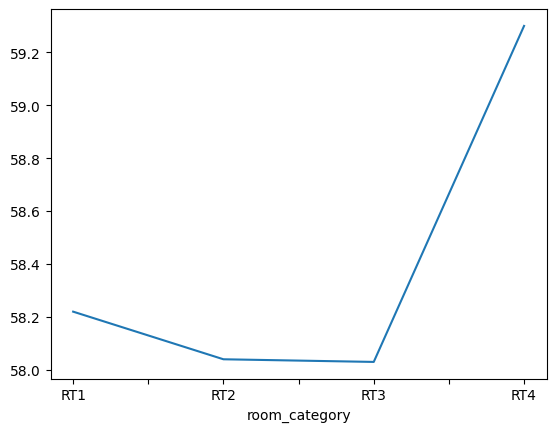

In [33]:
g = df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2).plot()

In [34]:
g

<Axes: xlabel='room_category'>

In [35]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


In [36]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [37]:
df_merge_bookings = pd.merge(df_agg_bookings,df_rooms,left_on='room_category',right_on='room_id')
df_merge_bookings.drop('room_id',axis=1,inplace=True)
df_merge_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard


In [38]:
g1 =  df_merge_bookings.groupby('room_class')['occ_pct'].mean().round()
g1

room_class
Elite           58.0
Premium         58.0
Presidential    59.0
Standard        58.0
Name: occ_pct, dtype: float64

<Axes: xlabel='room_class'>

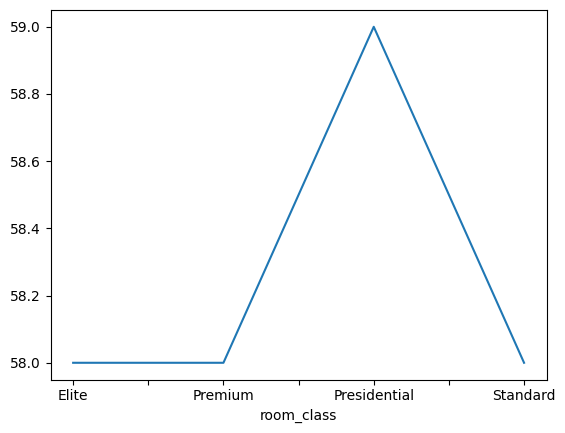

In [39]:
g1.plot()

In [40]:
df_merge = pd.merge(df_hotels,df_merge_bookings,on='property_id')
df_merge.head(2)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.74,Standard
1,16558,Atliq Grands,Luxury,Delhi,2-May-22,RT1,12,19.0,63.16,Standard


In [41]:
g2 = df_merge.groupby('city')['occ_pct'].mean().round(2)
g2

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_pct, dtype: float64

In [42]:
df_merge.isnull().sum()

property_id            0
property_name          0
category               0
city                   0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
occ_pct                2
room_class             0
dtype: int64

In [43]:
df_merge[df_merge['capacity'] > 0].isnull().sum()

property_id            0
property_name          0
category               0
city                   0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
occ_pct                0
room_class             0
dtype: int64

In [44]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [45]:
df_merge = pd.merge(df_merge,df_date,left_on='check_in_date',right_on='date')
df_merge.head()

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard,10-May-22,May 22,W 20,weekeday
1,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite,10-May-22,May 22,W 20,weekeday
2,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium,10-May-22,May 22,W 20,weekeday
3,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT4,2,3.0,66.67,Presidential,10-May-22,May 22,W 20,weekeday
4,16559,Atliq Exotica,Luxury,Mumbai,10-May-22,RT1,18,30.0,60.00,Standard,10-May-22,May 22,W 20,weekeday


In [46]:
df_merge.groupby('day_type')['occ_pct'].mean().round()

day_type
weekeday    51.0
weekend     72.0
Name: occ_pct, dtype: float64

In [47]:
df_merge.groupby('week no')['occ_pct'].mean().round()

week no
W 20    60.0
W 21    51.0
W 22    62.0
W 23    53.0
W 24    69.0
W 25    62.0
W 26    51.0
W 27    60.0
W 29    63.0
W 30    51.0
W 31    52.0
W 32    66.0
Name: occ_pct, dtype: float64

In [48]:
df_merge.groupby('mmm yy')['occ_pct'].mean().round()

mmm yy
Jul 22    56.0
Jun 22    59.0
May 22    57.0
Name: occ_pct, dtype: float64

<Axes: xlabel='mmm yy'>

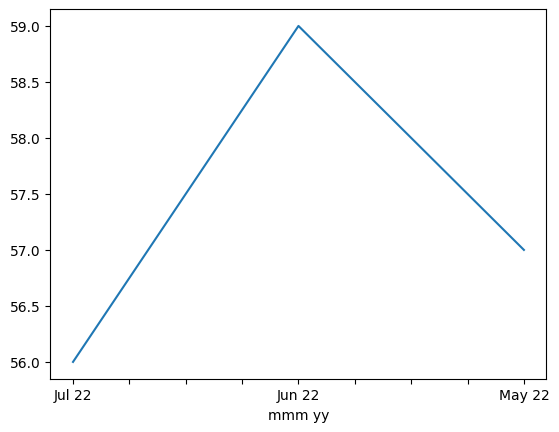

In [49]:
df_merge.groupby('mmm yy')['occ_pct'].mean().round().plot()

In [50]:
df_new_data_august = pd.read_csv("../Data-Analysis-Project/datasets/new_data_august.csv")
print(df_new_data_august.columns)

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')


In [51]:
df_merge.columns

Index(['property_id', 'property_name', 'category', 'city', 'check_in_date',
       'room_category', 'successful_bookings', 'capacity', 'occ_pct',
       'room_class', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [52]:
df_merge.shape

(6500, 14)

In [53]:
df_new_data_august.shape

(7, 13)

In [54]:
df_concate = pd.concat([df_merge,df_new_data_august],ignore_index=True,axis=0)
df_concate.tail(10)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type,occ%
6497,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT2,19,40.0,47.50,Elite,31-Jul-22,Jul 22,W 32,weekend,NaN
6498,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT3,11,24.0,45.83,Premium,31-Jul-22,Jul 22,W 32,weekend,NaN
6499,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT4,10,17.0,58.82,Presidential,31-Jul-22,Jul 22,W 32,weekend,NaN
6500,16559,Atliq Exotica,Luxury,Mumbai,01-Aug-22,RT1,30,30.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,100.00
6501,19562,Atliq Bay,Luxury,Bangalore,01-Aug-22,RT1,21,30.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,70.00
6502,19563,Atliq Palace,Business,Bangalore,01-Aug-22,RT1,23,30.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,76.67
6503,19558,Atliq Grands,Luxury,Bangalore,01-Aug-22,RT1,30,40.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,Atliq City,Business,Bangalore,01-Aug-22,RT1,20,26.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,Atliq Blu,Luxury,Mumbai,01-Aug-22,RT1,18,26.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,Atliq Seasons,Business,Mumbai,01-Aug-22,RT1,10,16.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,62.50


In [55]:
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [56]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [57]:
df_revenue = pd.merge(df_booking,df_hotels,on='property_id')
df_revenue.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [58]:
g4 = df_revenue.groupby('city')['revenue_realized'].sum()
g4

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

In [59]:
df_date['date'] = pd.to_datetime(df_date['date'])
print(df_date.info())
print(df_revenue.info())

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_10592\1227403226.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date'] = pd.to_datetime(df_date['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   b

In [60]:
df_revenue = pd.merge(df_revenue,df_date,left_on='check_in_date',right_on='date')
df_revenue.head()

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'check_in_date'. If you wish to proceed you should use pd.concat

In [ ]:
#df_revenue['check_in_date'] = pd.to_datetime(df_revenue['check_in_date'])
df_revenue[df_revenue['check_in_date'] == '13-05-22']
df_revenue['check_in_date'] = df_revenue['check_in_date']
print(df_revenue['check_in_date'].unique())
#df_revenue.apply(lambda x : if x == )

['1/5/2022' '2/5/2022' '3/5/2022' '4/5/2022' '5/5/2022' '6/5/2022'
 '7/5/2022' '8/5/2022' '9/5/2022' '10/5/2022' '11/5/2022' '12/5/2022'
 '13-05-22' '14-05-22' '15-05-22' '16-05-22' '17-05-22' '18-05-22'
 '19-05-22' '20-05-22' '21-05-22' '22-05-22' '23-05-22' '24-05-22'
 '25-05-22' '26-05-22' '27-05-22' '28-05-22' '29-05-22' '30-05-22'
 '31-05-22' '1/6/2022' '2/6/2022' '3/6/2022' '4/6/2022' '5/6/2022'
 '6/6/2022' '7/6/2022' '8/6/2022' '9/6/2022' '10/6/2022' '11/6/2022'
 '12/6/2022' '13-06-22' '14-06-22' '15-06-22' '16-06-22' '17-06-22'
 '18-06-22' '19-06-22' '20-06-22' '21-06-22' '22-06-22' '23-06-22'
 '24-06-22' '25-06-22' '26-06-22' '27-06-22' '28-06-22' '29-06-22'
 '30-06-22' '1/7/2022' '2/7/2022' '3/7/2022' '4/7/2022' '5/7/2022'
 '6/7/2022' '7/7/2022' '8/7/2022' '9/7/2022' '10/7/2022' '11/7/2022'
 '12/7/2022' '13-07-22' '14-07-22' '15-07-22' '16-07-22' '17-07-22'
 '18-07-22' '19-07-22' '20-07-22' '21-07-22' '22-07-22' '23-07-22'
 '24-07-22' '25-07-22' '26-07-22' '27-07-22' '28-07-2

In [ ]:
a = '31-07-22'
c = pd.to_datetime(a)
print(c)
print(a.split('-')[0],a.split('-')[1],a.split('-')[2].replace('22','2023'))
b = [a.split('-')[1],a.split('-')[0],a.split('-')[2].replace('22','2023')]
print("-".join(b))
print(a.endswith('-22'))


2022-07-31 00:00:00
31 07 2023
07-31-2023
True


In [ ]:
def to_date(x):
    return pd.to_datetime(x)
df_revenue['check_in_date'].apply(to_date)

In [ ]:
df_revenue['check_in_date'] = df_revenue['check_in_date'].apply(lambda x : pd.to_datetime(x))

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_6292\6629772.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_revenue['check_in_date'] = df_revenue['check_in_date'].apply(lambda x : pd.to_datetime(x))


In [ ]:
def chage_formet(x):
    a = str(x)
    if (a.endswith("-22")):
        b = [a.split('-')[1],a.split('-')[0],a.split('-')[2].replace('22','2023')]
        return "-".join(b)
    return x
df_revenue['check_in_date'] = df_revenue['check_in_date'].apply(chage_formet)
df_revenue['check_in_date'] = pd.to_datetime(df_revenue['check_in_date'])

In [ ]:
df_revenue = pd.merge(df_revenue,df_date,left_on='check_in_date',right_on='date')
df_revenue.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [ ]:
df_revenue.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    60278496
Jun 22    52903014
May 22    60961428
Name: revenue_realized, dtype: int64

In [ ]:
df_revenue.groupby('day_type')['revenue_realized'].sum()

day_type
weekeday    139233037
weekend      34909901
Name: revenue_realized, dtype: int64